In [1]:
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Oil Prices')
df

,Date,Closing_value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9603,2023-10-03,89.23
9604,2023-10-04,84.22
9605,2023-10-05,82.31
9606,2023-10-06,82.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9608 non-null   object 
 1   Closing_value  9608 non-null   float64
dtypes: float64(1), object(1)
memory usage: 150.2+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df

,Date,Closing_value,Year,Month,Day
0,1986-01-02,25.56,1986,1,2
1,1986-01-03,26.00,1986,1,3
2,1986-01-06,26.53,1986,1,6
3,1986-01-07,25.85,1986,1,7
4,1986-01-08,25.87,1986,1,8
...,...,...,...,...,...
9603,2023-10-03,89.23,2023,10,3
9604,2023-10-04,84.22,2023,10,4
9605,2023-10-05,82.31,2023,10,5
9606,2023-10-06,82.79,2023,10,6


In [6]:
new_order = ['Date', 'Year', 'Month', 'Day', 'Closing_value']
df = df[new_order]
df

,Date,Year,Month,Day,Closing_value
0,1986-01-02,1986,1,2,25.56
1,1986-01-03,1986,1,3,26.00
2,1986-01-06,1986,1,6,26.53
3,1986-01-07,1986,1,7,25.85
4,1986-01-08,1986,1,8,25.87
...,...,...,...,...,...
9603,2023-10-03,2023,10,3,89.23
9604,2023-10-04,2023,10,4,84.22
9605,2023-10-05,2023,10,5,82.31
9606,2023-10-06,2023,10,6,82.79


In [7]:
x = df.drop(['Date', 'Closing_value'], axis=1)
y = df['Closing_value']

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=30, random_state=5)

In [9]:
from xgboost import XGBRegressor


model= XGBRegressor(n_estimators= 120, max_depth = 3)
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
ypred = model.predict(xtest)
ypred

array([ 18.252205,  28.73542 ,  91.44654 ,  53.461857,  16.501469,
        33.442436,  94.12346 ,  13.638488,  61.586754,  68.59349 ,
        75.47111 ,  19.023146,  79.007095,  17.502947,  37.847458,
        94.3097  ,  16.71971 ,  75.63144 ,  55.88398 ,  20.528315,
        69.86922 ,  50.75751 ,  59.183014,  98.53095 ,  32.318207,
        93.7626  ,  54.568287,  20.153233,  55.951588, 114.12153 ],
      dtype=float32)

In [11]:
#Accuracy

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.386510575788332


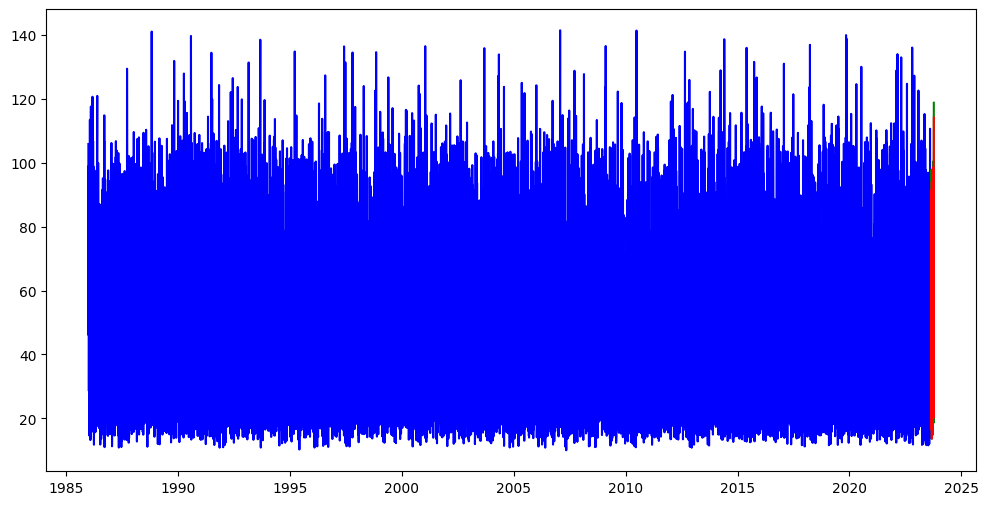

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

time_index = df['Date']
plt.figure(figsize=(12, 6))
plt.plot(time_index[:len(ytrain)], ytrain, label='Training Data', color='blue')
plt.plot(time_index[len(ytrain):], ytest, label='Testing Data', color='green')
plt.plot(time_index[len(ytrain):], ypred, label='Predictions', color='red')


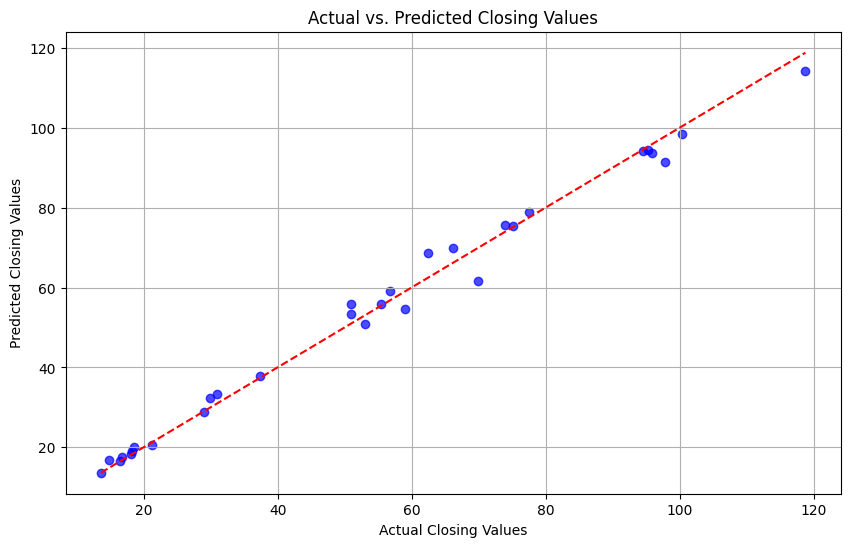

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue', alpha=0.7)
plt.title("Actual vs. Predicted Closing Values")
plt.xlabel("Actual Closing Values")
plt.ylabel("Predicted Closing Values")
plt.grid(True)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')

In [14]:
# Find the last date in your dataset
last_date = df['Date'].max()

# Add 1 year to the last date to find the end date for forecasting
end_date = last_date + pd.DateOffset(years=1)

# Generate a range of dates for the next 1 year
forecast_dates = pd.date_range(start=last_date, end=end_date, closed='right')

# Create a DataFrame with the forecast dates
forecast_df = pd.DataFrame({'Date': forecast_dates})

df1 = forecast_df
df1

<ipython-input-14-2da07c91855e>:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_date, end=end_date, closed='right')


,Date
0,2023-10-10
1,2023-10-11
2,2023-10-12
3,2023-10-13
4,2023-10-14
...,...
361,2024-10-05
362,2024-10-06
363,2024-10-07
364,2024-10-08


In [15]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1.loc[df1['Date'].isin(forecast_dates), 'Closing_value'] = None

In [16]:
df1

,Date,Year,Month,Day,Closing_value
0,2023-10-10,2023,10,10,NaN
1,2023-10-11,2023,10,11,NaN
2,2023-10-12,2023,10,12,NaN
3,2023-10-13,2023,10,13,NaN
4,2023-10-14,2023,10,14,NaN
...,...,...,...,...,...
361,2024-10-05,2024,10,5,NaN
362,2024-10-06,2024,10,6,NaN
363,2024-10-07,2024,10,7,NaN
364,2024-10-08,2024,10,8,NaN


In [17]:
# Concatenate the original DataFrame and the forecast DataFrame
df2 = pd.concat([df, df1], ignore_index=True)
df2

,Date,Year,Month,Day,Closing_value
0,1986-01-02,1986,1,2,25.56
1,1986-01-03,1986,1,3,26.00
2,1986-01-06,1986,1,6,26.53
3,1986-01-07,1986,1,7,25.85
4,1986-01-08,1986,1,8,25.87
...,...,...,...,...,...
9969,2024-10-05,2024,10,5,NaN
9970,2024-10-06,2024,10,6,NaN
9971,2024-10-07,2024,10,7,NaN
9972,2024-10-08,2024,10,8,NaN


In [18]:
X = df2.drop(['Date', 'Closing_value'], axis=1)
Y = df2['Closing_value']

In [19]:
Ypred = model.predict(X)
Ypred = pd.DataFrame(Ypred)
Ypred.columns = ['Forecasted_value']
Ypred

,Forecasted_value
0,24.011440
1,23.660009
2,23.711483
3,23.711483
4,23.711483
...,...
9969,88.314270
9970,88.314270
9971,88.314270
9972,88.314270


In [20]:
result = pd.concat([df2, Ypred], axis=1)
result

,Date,Year,Month,Day,Closing_value,Forecasted_value
0,1986-01-02,1986,1,2,25.56,24.011440
1,1986-01-03,1986,1,3,26.00,23.660009
2,1986-01-06,1986,1,6,26.53,23.711483
3,1986-01-07,1986,1,7,25.85,23.711483
4,1986-01-08,1986,1,8,25.87,23.711483
...,...,...,...,...,...,...
9969,2024-10-05,2024,10,5,NaN,88.314270
9970,2024-10-06,2024,10,6,NaN,88.314270
9971,2024-10-07,2024,10,7,NaN,88.314270
9972,2024-10-08,2024,10,8,NaN,88.314270


In [21]:
result['Difference'] = result['Closing_value'] - result['Forecasted_value']
result['Difference'].fillna(value=pd.NA, inplace=True)
result

,Date,Year,Month,Day,Closing_value,Forecasted_value,Difference
0,1986-01-02,1986,1,2,25.56,24.011440,1.548560
1,1986-01-03,1986,1,3,26.00,23.660009,2.339991
2,1986-01-06,1986,1,6,26.53,23.711483,2.818517
3,1986-01-07,1986,1,7,25.85,23.711483,2.138517
4,1986-01-08,1986,1,8,25.87,23.711483,2.158517
...,...,...,...,...,...,...,...
9969,2024-10-05,2024,10,5,NaN,88.314270,NaN
9970,2024-10-06,2024,10,6,NaN,88.314270,NaN
9971,2024-10-07,2024,10,7,NaN,88.314270,NaN
9972,2024-10-08,2024,10,8,NaN,88.314270,NaN


<Axes: >

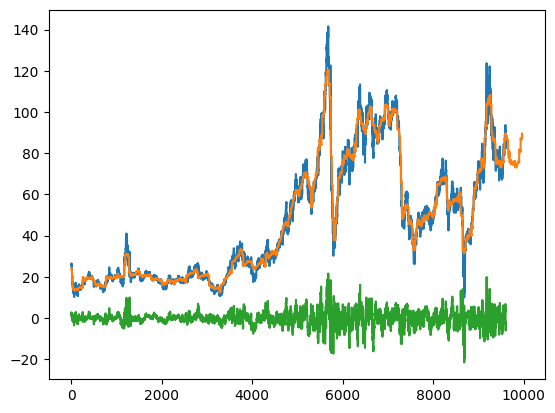

In [22]:
result['Closing_value'].plot()
result['Forecasted_value'].plot()
result['Difference'].plot()

### download result dataset for deployment

In [23]:
result.to_csv('forecasted_result.csv', index=False)